In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import joblib

In [3]:
data=pd.read_csv("/content/employee_data_large.csv")

In [ ]:
data


,experience,education,role,salary
0,1,Bachelors,Software Developer,35000
1,3,Masters,Data Scientist,65000
2,5,PhD,Machine Learning Engineer,120000
3,7,Masters,Web Developer,55000
4,2,Bachelors,Software Developer,40000
5,4,Bachelors,Web Developer,47000
6,6,Masters,Data Scientist,78000
7,8,PhD,Machine Learning Engineer,130000
8,10,PhD,Data Scientist,140000
9,12,PhD,Machine Learning Engineer,145000


In [4]:
data.shape

(27, 4)

In [5]:
data.head()

,experience,education,role,salary
0,1,Bachelors,Software Developer,35000
1,3,Masters,Data Scientist,65000
2,5,PhD,Machine Learning Engineer,120000
3,7,Masters,Web Developer,55000
4,2,Bachelors,Software Developer,40000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   experience  27 non-null     int64 
 1   education   27 non-null     object
 2   role        27 non-null     object
 3   salary      27 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 996.0+ bytes


In [7]:
data.isna()

,experience,education,role,salary
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [8]:
data.isna().sum()

,0
experience,0
education,0
role,0
salary,0


In [9]:
import matplotlib.pyplot as plt

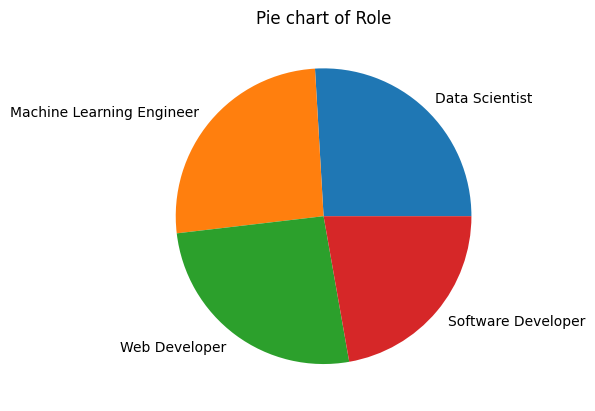

In [10]:
data['role'].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.title("Pie chart of Role")
plt.ylabel("")
plt.show()

In [11]:
data["role"].unique()

array(['Software Developer', 'Data Scientist',
       'Machine Learning Engineer', 'Web Developer'], dtype=object)

In [12]:
data["education"].describe()

,education
count,27
unique,3
top,Masters
freq,10


In [13]:
data["role"].describe()

,role
count,27
unique,4
top,Data Scientist
freq,7


In [14]:
data["experience"].describe()

,experience
count,27.000000
mean,5.962963
std,3.546195
min,0.000000
25%,3.000000
50%,6.000000
75%,8.500000
max,13.000000


In [15]:
X = data.drop("salary", axis=1)
y = data["salary"]

categorical = ["education", "role"]
numerical = ["experience"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical)
], remainder='passthrough')


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = Pipeline([
    ("pre", preprocessor),
    ("reg", LinearRegression())
])

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['education', 'role'])])),
                ('reg', LinearRegression())])

In [17]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 7635.638158755063


In [18]:
joblib.dump(model, "model.pkl")
print("Model trained and saved as model.pkl")


Model trained and saved as model.pkl
